<a href="https://colab.research.google.com/github/jbakery/Python-Portfolio/blob/main/Filtering_Spam_Email_Messages_Using_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Step 1 Import Python Packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [49]:
#Read Dataset into a Dataframe.

data_path = '/emails.csv'

message_dataset = pd.read_csv(data_path)
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [50]:
#Study Shape of the Dataset
message_dataset.shape

(5728, 2)

<Axes: ylabel='count'>

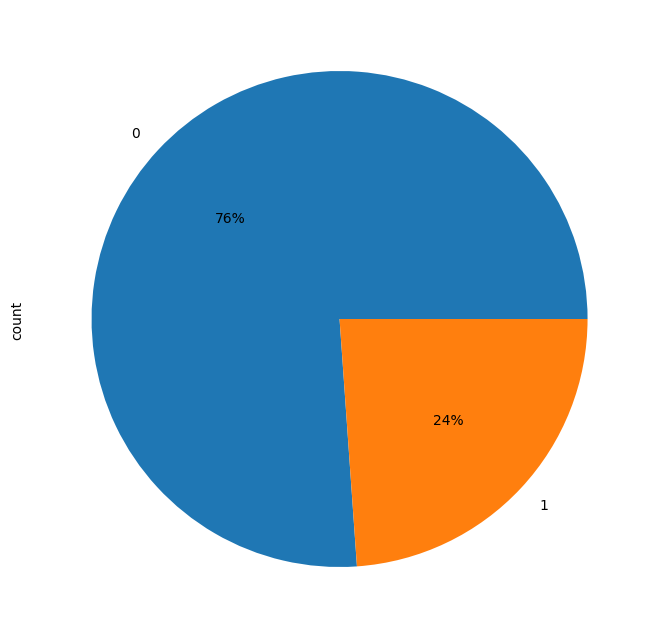

In [51]:
#Vizualize Dataset before traing the ML Model.
#Spam emails are 24% of the Dataset.
plt.rcParams["figure.figsize"] = (8,10)
message_dataset.spam.value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [52]:
#Remove all Stopwords form the script, these are words like 'a', and 'is'.

from nltk.corpus import stopwords
stop = stopwords.words('english')

message_dataset['text_without_sw'] = message_dataset['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
message_dataset.head()

,text,spam,text_without_sw
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: money , get software cds ! software c..."


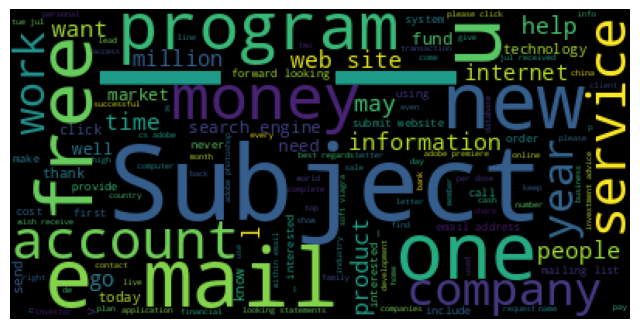

In [53]:
#Filter the datset down to only spam messages and plot a word cloud.

message_dataset_spam = message_dataset[message_dataset['spam'] == 1]





plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

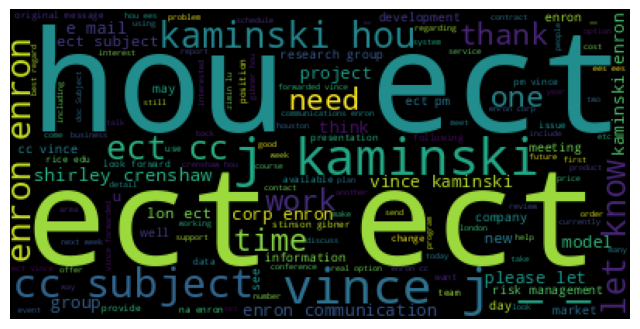

In [54]:
#Filter the datset down to only non spam messages and plot a word cloud.

message_dataset_spam = message_dataset[message_dataset['spam'] == 0]

plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [55]:
#Before training the ML Model the Data needs to be cleaned. Special characters and spaces created by removing special characters must be removed.

X = message_dataset["text"]

y = message_dataset["spam"]


In [56]:
#The following script defines a clean_text() method which accepts a text string and returns a string that is cleaned of digits, special characters, and multiple spaces.

def clean_text(doc):

  document = re.sub('[a-zA-Z]', ' ', doc)
  document = re.sub(r"\s+[a-zA-Z]\s+", ' ',document)
  document = re.sub(r'\s+',' ', document)

  return document

In [57]:
#This script calls the custom clean_text method created and preprocesses all the emails.

X_sentences = []
reviews = list(X)
for rev in reviews:
  X_sentences.append(clean_text(rev))


In [58]:
#Converting words into numbers using the TFIDF Method. This code will asssign each word a number to make it compatible with the Naive Bayes Algorithm.
#max_features(2500) means to use the 2500 max occuring words for the ML Model.
#min_df=5 use words that occur a minimum of 5 times.
#max_df = 0.7 means do not use words occur in more than 70% of the documents.

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(X_sentences).toarray()


In [59]:
#The data is now ready for input into the Naive Bayes Algorithm. We can train the ML Model.
#This step we split the data between test and training data.
#The data passed into the MultinomialNB machine learning algorithm.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)


MultinomialNB()

In [60]:
#Evaluating Model Performance

y_pred = spam_detector.predict(X_test)

In [61]:
#The output shows are model is 84.11% accurate in classifing Spam and Non Spam emails.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[842  14]
 [168 122]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       856
           1       0.90      0.42      0.57       290

    accuracy                           0.84      1146
   macro avg       0.87      0.70      0.74      1146
weighted avg       0.85      0.84      0.82      1146

0.8411867364746946


In [62]:
#Making Predictions on a Single Instance

print(X_sentences[56])
print(y[56])

 : , . , ( , , , , ) . ! 2 - 3 ! : - 2005 - $ 29 . 95 - 2 - $ 59 . 95 - 12 - $ 49 . 95 - 2004 ( 5 . 5 ) - $ 39 . 95 - 2004 - $ 119 . 95 ! , 
1


In [63]:
#The model correctly predicted the email as spam.

print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]
